<center>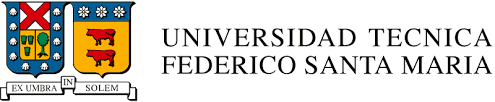</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Regularización
* SVM


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 12 de Mayo, en horario de clases.
* Fecha de entrega: 13 de Mayo. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif

# 1. Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl

La regresión lineal es un modelo matemático que pertenece al aprendizaje supervisado, el cual intenta aplicar relaciones que predigan el resultado de un evento basándose en los datos de variables independientes. Llamaremos a este resultado: variable objetivo o _target_, y como es un modelo de regresión lineal la variable objetivo es una variable continua.

<center><img src=https://t4.ftcdn.net/jpg/02/32/47/13/360_F_232471334_vfDHKHeRHtwkn0zvd8SM98THwQeYDn8y.jpg></center>

Los sistemas de bicicletas compartidas son un medio para alquilar bicicletas en el que el proceso de afiliación, alquiler y devolución se automatiza a través de una red de _quioscos o puntos de estacionamiento_ repartidos por toda la ciudad. Gracias a estos sistemas, los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten.

En esta pregunta se le proporcionan datos de alquiler de la cantidad de bicicletas arrendadas por hora durante dos años según variables climáticas y laborales. 

Usted tiene separar el dataset en un conjunto de entrenamiento y en un conjunto de prueba, y el objetivo de esta pregunta será: **predecir el número total de bicicletas alquiladas en el conjunto de pruebas**.

La base de datos y toda la información asociada a esta se puede encontrar en el siguiente link: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

### 1.1.1 Exploración del conjunto de datos




In [2]:
data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Explore el conjunto de datos y responda  brevemente las siguiente preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

Las variables que poseen valores numéricos son: Rented Bike Count, Hour, Tempretature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm) y Snowfall (cm). Mientras que las variables que poseen valores categóricos son: Date, Seasons, Holiday y Functioning Day.

Esta información la podemos extraer luego de ejecutar la función _datainfo()_ programada en la casilla de más abajo.

> b) ¿Qué aspecto tienen en común las variables _Date_ y _Season_?

Podemos notar que la variable _Season_ corresponde a una categorización del intervalo de la variable _Date_. Por lo tanto, ambas variables nos dan a conocer a que altura temporal del año corresponde el registro dado.

> c) Revise si faltan valores en los conjuntos de datos de prueba y de entrenamiento.

Aún no hemos separado el conjunto de datos en conjunto de prueba y de entrenamiento, pero podemos observar a continuación que no falta ningun valor en la totalidad del dataset.

In [4]:
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


### 1.1.2 Exploración de Features

> a) Revise detalladamente las variables: 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos cuente y grafique su histograma.


Una vez analizado lo anterior responda las siguientes preguntas:

> b) ¿La gente arrienda más bicicletas en vacaciones o en días de trabajo?

La gente arrienda muchas más bicicletas en días de trabajo.
> c) ¿Se arriendan más bicicletas los fines de semana o durante la semana?

Se arriendan más biciletas durante la semana.

> d) ¿De qué forma afecta el clima al arriendo de bicicletas?

Podemos observar que el arriendo de biciletas esta relacionado con la calidas de la estación, pues una gran cantidad de personas arrienda en verano, mientras que muy pocas personas arriendan bicicletas en invierno.



Para las preguntas b), c) y d) apóyese de los gráficos.

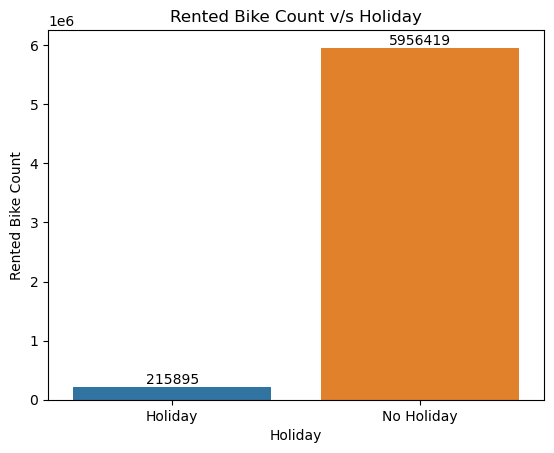

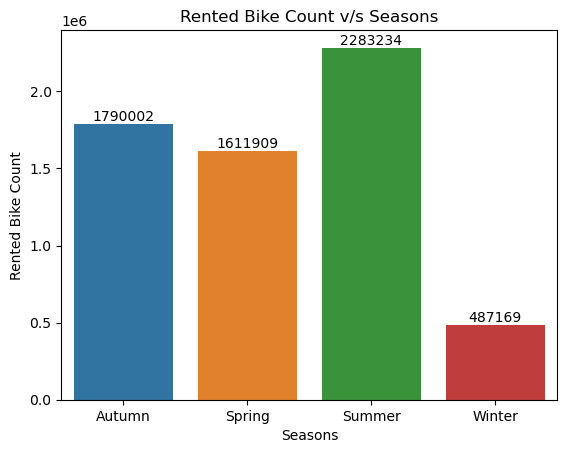

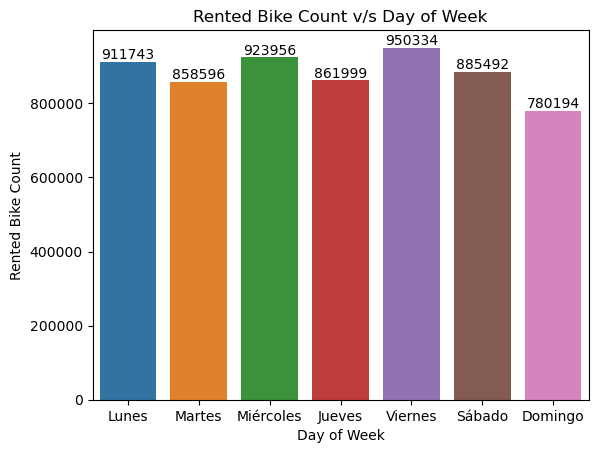

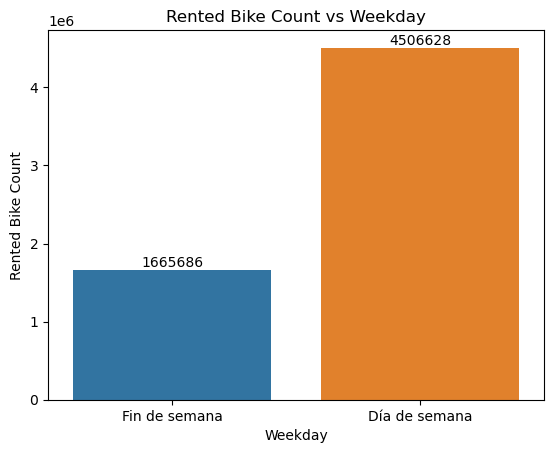

In [5]:
# Revisar las variables solicitadas
cat_features = ['Holiday', 'Seasons', 'Rented Bike Count']

# Función para agregar las frecuencias sobre las barras
def add_total_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom')

# Convertir la columna 'Date' a tipo de dato fecha
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Crear una nueva columna 'Day of Week' con el día de la semana correspondiente (0 = lunes, 6 = domingo)
data['Day of Week'] = data['Date'].dt.dayofweek

# Iterar sobre las columnas en cat_features
for selected_feature in cat_features:
    # Gráfico para 'Holiday'
    if selected_feature == 'Holiday':
        holiday_counts = data.groupby('Holiday')['Rented Bike Count'].sum().reset_index()
        ax = sns.barplot(x='Holiday', y='Rented Bike Count', data=holiday_counts)
        plt.title('Rented Bike Count v/s Holiday')
        add_total_labels(ax)
        plt.show()

    # Gráfico para 'Seasons'
    if selected_feature == 'Seasons':
        season_counts = data.groupby('Seasons')['Rented Bike Count'].sum().reset_index()
        ax = sns.barplot(x='Seasons', y='Rented Bike Count', data=season_counts)
        plt.title('Rented Bike Count v/s Seasons')
        add_total_labels(ax)
        plt.show()

    # Gráfico para 'Rented Bike Count' por día de la semana
    if selected_feature == 'Rented Bike Count':
        # Agrupar los datos por 'Day of Week' y calcular el total de bicicletas alquiladas
        daily_counts = data.groupby('Day of Week')['Rented Bike Count'].sum().reset_index()

        # Crear el gráfico de barras
        ax = sns.barplot(x='Day of Week', y='Rented Bike Count', data=daily_counts)

        # Configurar las etiquetas del eje x
        ax.set_xticklabels(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

        # Configurar el título del gráfico
        plt.title('Rented Bike Count v/s Day of Week')

        # Agregar las frecuencias sobre las barras del gráfico
        add_total_labels(ax)

        # Mostrar el gráfico
        plt.show()
        
# Convertir la columna 'Date' a tipo de dato fecha
data['Date'] = pd.to_datetime(data['Date'])

# Crear una nueva columna 'Weekday' con valores booleanos (True si es un día de semana, False si es fin de semana)
data['Weekday'] = data['Date'].dt.weekday < 5

# Agrupar los datos por 'Weekday' y calcular el total de bicicletas alquiladas
total_rented_bikes = data.groupby('Weekday')['Rented Bike Count'].sum()

# Crear un gráfico de barras utilizando seaborn
ax = sns.barplot(x=total_rented_bikes.index, y=total_rented_bikes.values)

# Configurar las etiquetas del eje x
ax.set_xticklabels(['Fin de semana', 'Día de semana'])

# Configurar el título y las etiquetas de los ejes
plt.title('Rented Bike Count vs Weekday')
plt.xlabel('Weekday')
plt.ylabel('Rented Bike Count')

# Función para agregar las frecuencias sobre las barras
def agregar_etiquetas_frecuencia(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, int(height), ha='center', va='bottom')

# Agregar las frecuencias sobre las barras del gráfico
agregar_etiquetas_frecuencia(ax)

# Mostrar el gráfico
plt.show()

> e) Grafique el promedio de bicicletas arrendadas por estación ('Seasons').

En promedio, cada estación tiene 91.25 días, por lo tanto usaremos esta información para nuestro nuevo gráfico.

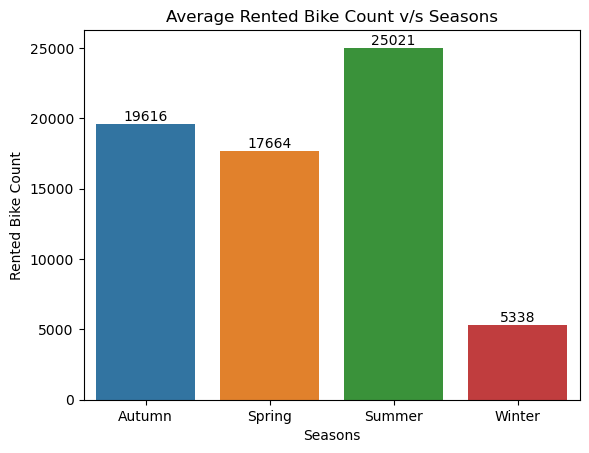

In [6]:
season_counts = data.groupby('Seasons')['Rented Bike Count'].sum().reset_index()
count_y = season_counts['Rented Bike Count']/91.25
ax = sns.barplot(x='Seasons', y=count_y, data=season_counts)
plt.title('Average Rented Bike Count v/s Seasons')
add_total_labels(ax)
plt.show()

Responda las siguientes preguntas:

> f) ¿Cuáles son las estaciones en las que más se arriendan bicicletas?

Con lo anterior podemos notar que claramente la estación donde más se arriendas bicicletas es en verano, seguido  otoño y primavera.

> g) Transforme la fecha en variables numéricas, es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.

In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['dayofweek'] = data['Date'].dt.dayofweek

data.drop('Date', axis=1, inplace=True)

> h) Grafique y analice de forma general la correlación entre las variables **numéricas**. 

<Axes: >

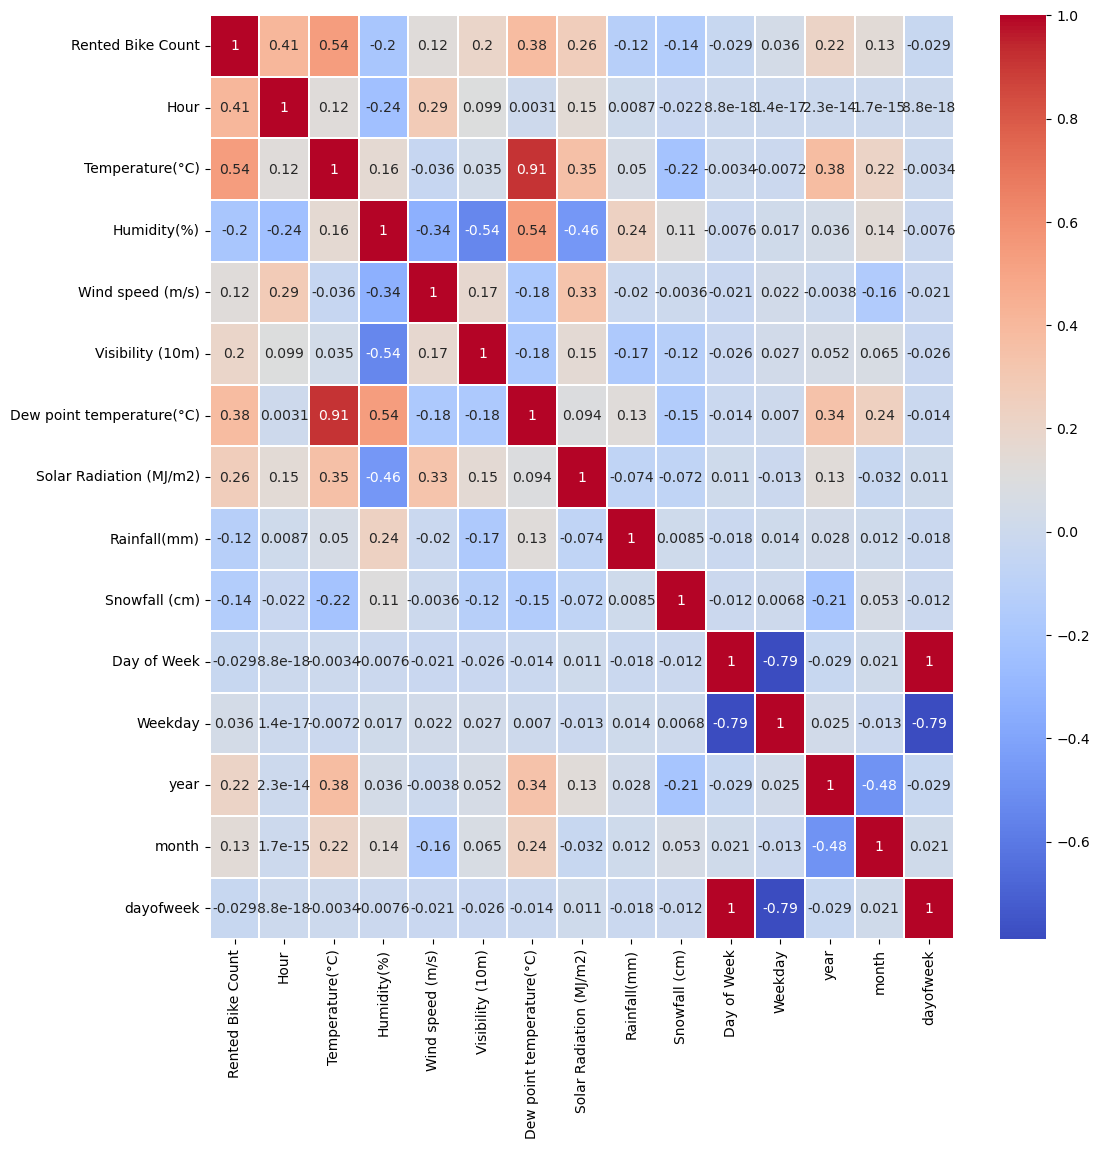

In [8]:
data_corr= data.corr(numeric_only=True)       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

> i) Escriba sus conclusiones sobre los resultados encontrados en la correlación en la pregunta h)

Este grafico de calor nos permite observar de manera muy ilustrativa la relación que tienen las variables sobre el conjunto de datos, en la que destacan las variables que estan relacionadas entre si debido a su naturaleza fisica, como por ejemplo, temperatura, radiación solar, viento, humedad y punto de rocio, por lo que seria adecuado no considerarlas por separado ya que son en una medida no despreciable, redundantes. Dicho esto, podemos observar como otras variables si estan relacionadas y no son redundantes tal como la hora del día con arriendos, temperatura y arriendos, y día por arriendo.

### 1.1.3 Separación de conjuntos

> a) Divida el dataset en features _X_ y target _y_, además divida el dataset en un subconjunto de entrenamiento y otro de prueba.

In [9]:
y=data['Rented Bike Count']
X=data.drop('Rented Bike Count',axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify = data['Seasons'])

> a) ¿Para qué es el parámetro stratify?

El parámetro stratify nos permite que cuando se generen los bloques de entrenamiento y de prueba, estos **mantengan la proporción de la muestra** del dataset original, teniendo como referencia algunas de las carácteristicas. Por ejemplo, si suponemos que en el data set original hay hipoteticamente una proporción de la muestra con

- Verano : 10%
- Invierno: 20%
- Otoño: 30%
- Primavera: 40%

entonces en los bloques de entrenamiento y de prueba, tendremos que seguirán habiendo un 10% de los datos obtenidos en verano, un 20% obtenidos en invierno, un 30% obtenido en otoño y un 40% obtenido en primavera.


> b) Aplique Label Encoding a las variables _Seasons_ y _Holiday_ en el conjunto de entrenamiento y responda para qué sirve y como se usa.

In [11]:
le_seasons = preprocessing.LabelEncoder()
X_train["Seasons"] = le_seasons.fit_transform(X_train["Seasons"])
le_holiday = preprocessing.LabelEncoder()
X_train["Holiday"] = le_holiday.fit_transform(X_train["Holiday"])
le_fday = preprocessing.LabelEncoder()
X_train["Functioning Day"] = le_fday.fit_transform(X_train["Functioning Day"])

El Label Encoding consiste en convertir las etiquetas en un formato numérico para que la máquina logre comprender los datos. A continuación se presentará un ejemplo clasico para entender de mejor forma esto: Supongamos que tengamos una columna o variable con 3 colores únicos, los cuales son rojo, verde y azul. Al aplicar Label Encoding, a los datos se le asignaran valores numéricos, en este caso, 0, 1 y 2 respectivamente.

Para usar esta función debemos identificar si nuestro conjunto de datos posee una variable o columna categorica, para pasarles estas columnas como argumento.

> c) Aplique la transformación aprendida por el Label Encoder al conjunto de prueba.

In [12]:
X_test["Seasons"] = le_seasons.transform(X_test["Seasons"])
X_test["Holiday"] = le_holiday.transform(X_test["Holiday"])
X_test["Functioning Day"] = le_fday.transform(X_test["Functioning Day"])

> d) ¿Por qué no se aplica la transformación del Label Encoder directamente sobre el conjunto de datos completo?

Es importante que al aplicar cualquier tipo de transformación a los datos, esta se efectue después de haber divido los datos en conjuntos de entrenamiento y de prueba, así podemos asegurar que el modelo de entrenamiento solo tendrá acceso a los datos destinados al entrenamiento. Ya que en el caso de Label Encoding, el codificador podría aprender información valiosa sobre el conjunto total de datos.

## 1.2 Modelos de Regresión

Primero entrenaremos un regresor lineal con los datos _en bruto_, ya que básicamente se transformaron las variables _Date_, _Seasons_ y _Holiday_ tal que todos los datos se puedan procesar por el regresor.

### 1.2.1 Modelo en bruto

> a) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

```LinearRegression()```: Esta línea crea un nuevo objeto de regresión lineal. La regresión lineal es un método estadístico que se utiliza para predecir una variable dependiente (en este caso, 'Rented Bike Count') basándose en una o más variables independientes (las demás características en el dataset).

```.fit(X_train, y_train)```: Esta línea entrena el modelo de regresión lineal utilizando tus datos de entrenamiento. En otras palabras, está ajustando la línea (o hiperplano en múltiples dimensiones) que mejor se adapta a tus datos de entrenamiento.

In [13]:
reg = LinearRegression().fit(X_train, y_train)

> b) Obtenga el error cuadrático medio de la predicción sobre los datos del conjunto *X_test*

In [14]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

185244.27592630743

> c) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

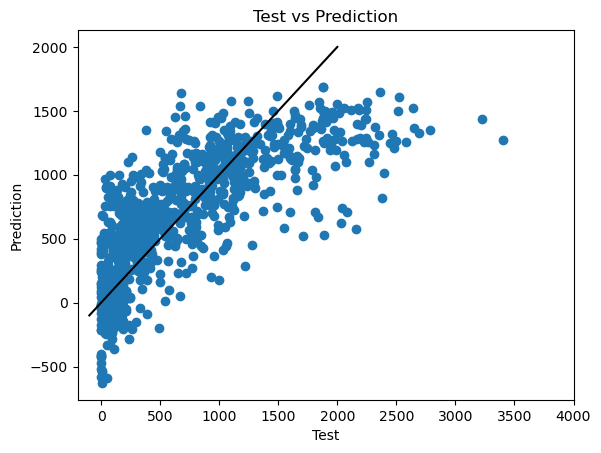

In [15]:
plt.scatter(y_test, y_pred)

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

x=np.linspace(-100,2000,4201)
plt.plot(x,x,'k-')
plt.xlim([-200, 4000])

plt.show()

### 1.2.2 Modelo preprocesado

Variables cíclicas

Si aplicaramos variables _Dummy_ o transformar con _One Hot Encoder_ a la fecha terminaríamos con 12 columnas para los meses, 7 columnas para los días de la semana y 24 columnas para la hora! En lugar de eso nos aprovecharemos de que todas estas variables son cíclicas, es decir, después de 23:00 hrs viene 00:00 hrs y el ciclo se vuelve a repetir, lo mismo para los meses del año y los días de la semana. Entonces podemos pensar en este ciclo como si fuera un _circulo_ utilizando el seno y el coseno de la fecha tenemos las coordenada de la fecha en el _circulo_. De esta forma las 23:00 y las 00:00 son cercanas en esta representación. Gracias a lo anterior nos quedamos con solo 2 columnas.

$\text{var_cos} = \cos(2π\; \text{var}/\text{periodo})$

$\text{var_sin} = \sin(2π\; \text{var}/\text{periodo})$

> a) ¿Por qué no simplemente usar solo el seno o solo el coseno?

Porque si consideramos solo una de las funciones anteriores tendriamos un comportamiento oscilatorio, pero nosotros estamos buscando un comportamiento ciclico, por lo cual es necesario usar ambas funciones.

In [16]:
X_train['month_sin'] = np.sin(2 * np.pi * X_train['month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['month'] / 12)
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
X_train['hour_cos'] = np.cos(2 * np.pi * X_train['Hour'] / 24)

X_test['month_sin'] = np.sin(2 * np.pi * X_test['month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['month'] / 12)
X_test['hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
X_test['hour_cos'] = np.cos(2 * np.pi * X_test['Hour'] / 24)

X_train.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)
X_test.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)

#### Estación

> b) Aplique la misma lógica de variable _cíclica_ a la variable _Season_.

In [17]:
X_train['Sin_Season'] = np.sin(2 * np.pi * X_train['Seasons'] / 4) 
X_train['Cos_Season'] = np.cos(2 * np.pi * X_train['Seasons'] / 4)
X_train.drop('Seasons', axis=1, inplace=True)

In [18]:
X_test['Sin_Season'] = np.sin(2 * np.pi * X_test['Seasons'] / 4) 
X_test['Cos_Season'] = np.cos(2 * np.pi * X_test['Seasons'] / 4) 
X_test.drop('Seasons', axis=1, inplace=True)

#### Normalización de variables.

> c) Transforme las variables para que estas sigan una distribución normal con media 0 y varianza 1.



In [19]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = ['Temperature(°C)', 
                     'Humidity(%)', 
                     'Wind speed (m/s)', 
                     'Visibility (10m)', 
                     'Dew point temperature(°C)', 
                     'Solar Radiation (MJ/m2)',	
                     'Rainfall(mm)',	
                     'Snowfall (cm)',
                     'year']

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

> d) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [20]:
reg = LinearRegression().fit(X_train, y_train)

> e) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [21]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)

> f) Calcule el error cuadrático medio en la escala original de bicicletas

In [22]:
mean_squared_error(y_test, y_pred)

175246.11552288986

> g) ¿Mejoran los resultados con respecto al modelo entrenado sobre los datos en bruto?

Si, pues el error cuadrático medio obtenido con los datos en bruto es mayor al error cuadrático medio obetnido con regularización.

> h) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

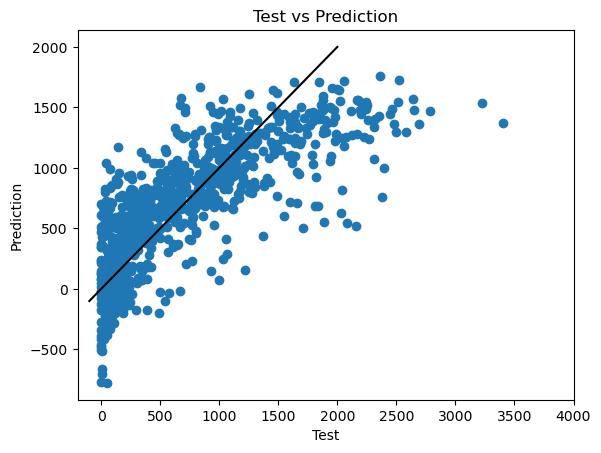

In [23]:
plt.scatter(y_test, y_pred)

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

x=np.linspace(-100,2000,4201)
plt.plot(x,x,'k-')
plt.xlim([-200, 4000])

plt.show()

### 1.2.3 Modelo SGD

En esta pregunta aplicaremos el modelo de regresión lineal utilizando el gradiente descendente estocástico (SGD), y para visualizar su rendimiento observaremos el error cuadrático medio a medida que el algoritmo SGD va iterando a través de las _epochs_. Para ello necesitamos separar una porción del conjunto de entrenamiento y así obtener el error de validación del modelo en ejemplos que no ha visto.

> a) Separe el conjunto de entrenamiento en un subconjunto de entrenamiento y uno de validación.

In [24]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25)

Utilize la librería _sklearn_ para entrenar el modelo a través _SGDRegressor_ y responda las siguientes preguntas:

> b) ¿Para qué sirve cada uno de los parametros que acepta _SGDRegressor_? Describa brevemente cada uno.

```loss```: Es la función de pérdida a ser utilizada. El valor predeterminado es 'squared_loss', que se refiere al error cuadrático medio. Otros valores posibles son 'huber', 'epsilon_insensitive' y 'squared_epsilon_insensitive'.

```penalty```: Es el término de regularización a ser utilizado. El valor predeterminado es 'l2', que se refiere a la regularización de Ridge. Otros valores posibles son 'l1' (Lasso), 'elasticnet' (una combinación de L1 y L2) y None (sin regularización).

```alpha```: Es el parámetro de regularización. Cuanto mayor sea el valor de alpha, más fuerte será la regularización. La regularización puede ayudar a prevenir el sobreajuste.

```l1_ratio```: Parámetro de mezcla para Elastic Net (Penalización que combina las regularizaciones 'l1' y 'l2') que se mueve entre 0 y 1, si 'l1_ratio' es 0 se recupera la penalización 'l2', si es 1 se recupera 'l1'.

```fit_intercept```: Parámetro booleano para indicar estimación de intercepto, si es Falso se asume distribución de datos centrada.

```max_iter```: Máximo número de iteraciones que puede tomar el modelo.

```tol```: Es el criterio de parada. El entrenamiento se detendrá cuando la pérdida no mejore más de 'tol' durante cierto número de iteraciones.

```shuffle```: Si es True, los datos de entrenamiento se barajan antes de cada época.

```verbose```: Parámentro que controla el volumen de texto que muestra al correr el modelo.

```epsilon```: Parámetro para las funciones de pérdida 'huber', 'epsilon_insensitive' y 'squared_epsilon_insensitive'.

```random_state```: Estado aleatorio específico, útil para reproducibilidad.

```learning_rate```: Elección de como varía el parámetro de ratio de aprendizaje, puede ser 'constant', ‘optimal', ‘invscaling’ y ‘adaptive’, dependen del ratio de aprendizaje incial ‘eta0’.

```eta0```: Ratio de aprendizaje inicial.

```power_t```: Exponente para ratios de aprendizale con decaimiento inverso.

```early_stopping```: Parámetro booleano que permite detener las iteraciones si no hay cambios drásticos en múltiples iteraciones seguidas, depende de 'n_iter_no_change'.

```validation_fraction```: Proporción de datos a separar como conjunto de validación para el método de 'early_stopping', se elige entre 0 y 1.

```n_iter_no_change```: Cantidad de iteraciones sin mejora antes de aplicar el 'early_stopping'.

```warm_start```: Si es True, el modelo reutiliza la solución de la llamada anterior para ajustarse como inicialización. De lo contrario, simplemente borra la solución anterior.

```average```: Parámetro que indica a partir de cuál iteración guardar los pesos promedidados en cada actualización para ser guardados en 'coef_', puede ser True para partir de la primera iteración.



> c) Explique cuál es la función del parámetro alpha y compare, teóricamente, las variaciones de implementación del parámetro disponibles en el módulo, es decir, compare: _constant_ vs _optimal_ vs _invscaling_ vs _adaptive_.

El parámetro 'alpha' es el parámetro que acompaña la regularización de modelo e indica que tan fuerte será el efecto de esta. De los posibles 'learning_rate' para el modelo, el único que depende de manera dinámica de 'alpha' es ‘optimal’, que plantea un learning rate de la forma $\eta = 1/(\alpha \cdot (t+t_0))$, de manera que el valor de alpha afecta la tasa de decaimiento del ratio de aprendizaje.

In [25]:
reg = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True)

Entrene el regresor SGD por 100 _epochs_ como máximo, utilizando *early_stoping* con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por epoca y responda las siguientes preguntas:

> d) ¿Para qué sirve el *early_stoping*?

El *early_stopping* sirve para detener el proceso de entrenamiento antes de que se produzca el sobreajuste del modelo, lo que puede mejorar su capacidad para generalizar a nuevos datos y mejorar su precisión en la predicción.

> e) ¿Cómo se interpretan los resultados del entrenamiento según las curvas obtenidas?

Según las curvas obtenidas (graficadas más abajo) podemos observar que el modelo esta entrenando bien, porque ambas curvas (entrenamiento y validación) estan decayendo. 

> f) ¿Cuántas _epochs_ duró su entrenamiento?


In [26]:
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors, val_errors = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

Stopping training after 77 epochs


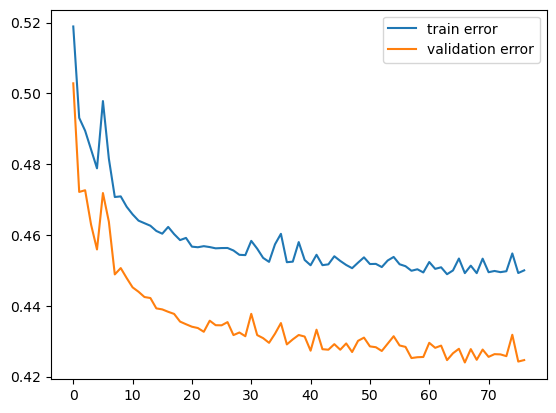

In [27]:
plt.plot(tr_errors, label='train error')
plt.plot(val_errors, label='validation error')
plt.legend()
plt.show()

> g) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [28]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred.reshape(-1,1))

> h) Calcule el error cuadrático medio en la escala original de bicicletas

In [29]:
mean_squared_error(y_test, y_pred)

175488.17233137175

> i) ¿Mejoran los resultados con respecto al modelo anterior?

Dado que el error cuadrático medio es mayor en este caso, podemos concluir que los resultados no mejoran con este nuevo modelo.

> j) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

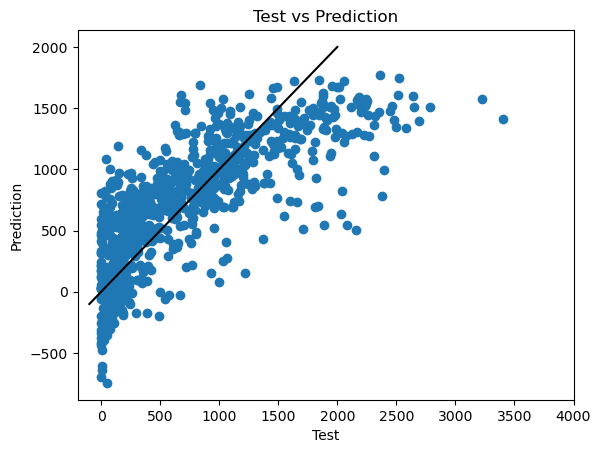

In [30]:
plt.scatter(y_test, y_pred)

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

x=np.linspace(-100,2000,4201)
plt.plot(x,x,'k-')
plt.xlim([-200, 4000])

plt.show()

## 1.3 Modelo con Regularización

### 1.3.1 Regularización Ridge y Lasso

Agregue regularización Ridge al modelo SGD y entrénelo por 100 epochs como máximo, utilizando early_stoping con un a paciencia de 10 epochs. Grafique el error cuadrático medio por epoch.

In [31]:
reg = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=500, #epochs
                   tol=0.01, 
                   shuffle=True,
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.25
                  )

In [32]:
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors, val_errors = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):

    reg.partial_fit(X_tr, y_tr)

    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors.append(tr_error)
    val_errors.append(val_error)

    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break

Stopping training after 97 epochs


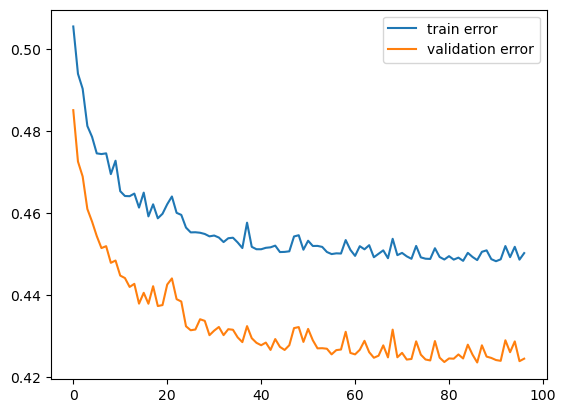

In [33]:
plt.plot(tr_errors, label='train error')
plt.plot(val_errors, label='validation error')
plt.legend()
plt.show()

In [34]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred.reshape(-1,1))

mean_squared_error(y_test, y_pred)

175443.00799866236

Responda las siguientes preguntas:

> a) ¿Qué son los llamados hiperparámetros de un modelo y como se relacionan con el concepto de hyper tuning?

Los hiperparámetros son parámetros que no se aprenden automáticamente durante el entrenamiento de un modelo de aprendizaje automático y deben ser ajustados manualmente antes de entrenar el modelo. El proceso de ajuste de hiperparámetros se conoce como hyper tuning y tiene como objetivo encontrar los valores óptimos para los hiperparámetros que maximizan el rendimiento del modelo en un conjunto de datos de validación.

> b) ¿Cuál es la motivación de agregar una penalización al modelo?

La motivación de agregar una penalización al modelo es controlar el espacio de soluciones, la forma que tendrán estas y evitar el sobreajuste en el proceso.

> c) ¿De qué se compone la penalización mediante regularización Ridge?

La penalización l2 consiste en sumar la norma cuadrada del vector solución a la función de costo a minimizar, permitiendo controlar el espacio de soluciones acotandolo en torno al vector nulo 0, esto porque soluciones lejanas al 0 tendrán una penalización que crece al cuadrado de la distancia siendo descartadas inmediatamente. Útil para controlar el overfitting.

> d) ¿Cómo funciona la regularización Lasso?

La penalización l1 consiste en sumar el valor absoluto de las componentes del vector solución a la función de costo a minimizar, esta regularización fuerza a que a características menos relevantes sean descartadas con asignación de coeficientes nulos.

> e) ¿Cuáles son las ventajas y desventajas de usar regularización Ridge versus Lasso?

Lasso:
- Ventajas: Lasso es útil en problemas donde se tenga indicios de características poco relevantes para la predicción. Tiene alta interpretabilidad para el contexto del problema. 
- Desventajas: Tiene mal desmpeño en problemas con datos sparce (alto volumen de 0s en los datos), donde descarta más variables de las necesarias. Baja tolerancia a la colinealidad de características.

Ridge:
- Ventajas: Mayor estabilidad numerica al ser una función diferenciable en todo su dominio (cosa que no ocurre con Lasso). Alta tolerancia a la colinealidad de características .
- Desventajas: Poco interpretable en el sentido práctico de los datos. No realiza selección y descarte de características como Lasso.

> f) Utilizando GridSearchCV optimize el hiperparámetro _learning rate_ para los valores 0.1, 0.01, 0.001.

> g) Pruebe con distintos tipos de _learning rate_ 'constant', 'optimal', 'invscaling'.

> h) Optimize también los hiperparámetros de coeficiente de regularización de l2 y l1 para los valores 0.0001, 0.001, 0.01.



> **Nota:** Investigue y lea la documentación de SGDRegressor, de KFold y de GridSearchCV antes de modificar y ejecutar el código, recuerde que el código presentado en el notebook es solo una guía de referencia y no necesariamente funciona, usted puede modificar su propio código y explicar su funcionamiento.

In [35]:
k=5
cv_folds=KFold(n_splits=k, shuffle=True)

In [36]:
reg = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=100, #epochs
                   tol=0.01, 
                   shuffle=True,                                       
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.25,
                   early_stopping=True,
                   n_iter_no_change=10
                  )

In [37]:
param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1'],
              'alpha': [0.0001, 0.001, 0.01],                
              'learning_rate': ['constant', 'optimal', 'invscaling']}

hypereg = GridSearchCV(reg, 
            param_grid, 
            scoring='neg_mean_squared_error',               
            refit=True, 
            cv=cv_folds, 
            verbose=0, 
            n_jobs = 8
            )

In [38]:
res = hypereg.fit(X_train, y_train.ravel())

> i) Obtenga los resultados para cada hiperparámetro de la grilla.

In [39]:
pd.DataFrame(hypereg.cv_results_).sort_values(by=["rank_test_score"]).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,0.035032,0.004247,0.003803,0.000401,0.001,0.001,constant,l2,"{'alpha': 0.001, 'eta0': 0.001, 'learning_rate...",-0.436327,-0.466564,-0.434041,-0.480258,-0.472808,-0.458000,0.019140,1
31,0.045842,0.003604,0.004003,0.000633,0.001,0.001,constant,l1,"{'alpha': 0.001, 'eta0': 0.001, 'learning_rate...",-0.429896,-0.472851,-0.440062,-0.479982,-0.467637,-0.458086,0.019536,2
13,0.040637,0.002500,0.003604,0.000490,0.0001,0.001,constant,l1,"{'alpha': 0.0001, 'eta0': 0.001, 'learning_rat...",-0.436067,-0.471918,-0.443833,-0.469971,-0.471114,-0.458581,0.015421,3
10,0.033630,0.003009,0.003404,0.000491,0.0001,0.01,invscaling,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-0.439984,-0.469456,-0.445047,-0.478856,-0.471791,-0.461027,0.015511,4
29,0.044440,0.001358,0.003804,0.000401,0.001,0.01,invscaling,l1,"{'alpha': 0.001, 'eta0': 0.01, 'learning_rate'...",-0.436919,-0.472595,-0.445337,-0.478110,-0.472234,-0.461039,0.016605,5


> j) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [40]:
y_pred = hypereg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred.reshape(-1,1))

> k) Calcule el error cuadrático medio en la escala original de bicicletas

In [41]:
mean_squared_error(y_test, y_pred)

180304.33065844254

> l) ¿Mejoran los resultados con respecto a los modelo anteriores?

Dado que el error cuadrático medio es mayor en este caso, podemos concluir que los resultados no mejoran con este nuevo modelo.

> m) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

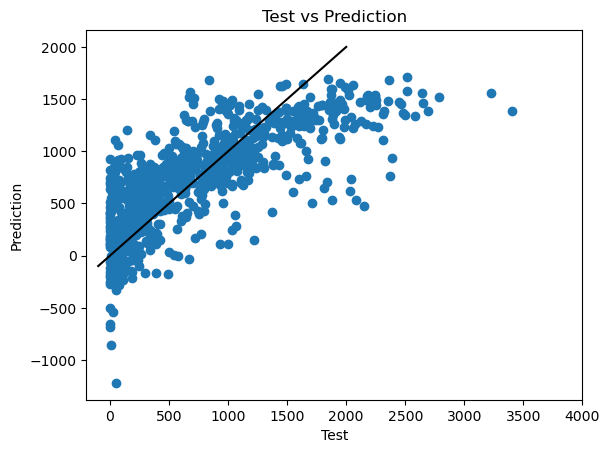

In [42]:
plt.scatter(y_test, y_pred)

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

x=np.linspace(-100,2000,4201)
plt.plot(x,x,'k-')
plt.xlim([-200, 4000])

plt.show()

## 1.4 Conclusiones:

Podemos concluir que las herramientas utilizadas anteriormente son fundamentales para el ajuste de modelos de aprendizaje, entre las más relevantes tenemos:
- Label Enconding: Con esta herramienta logramos hacer que los atributos sean entendibles y trabajables para la maquina. 
- Transformación de variables ciclicas: Es importante para captar comportamientos de variables cíclicas que por defecto no interpretaria la maquina.
- Estandarización: Es útil, pues elimina la noción de escalas, evita cesgos del modelo y nos permite aumentar la velocidad computacional.
- Regularización: Es una herramienta útil en casos dónde se tenga mayor familiaridad con la naturaleza de los datos y el comportamiento de las soluciones esperadas. Aunque no fue una herramienta particularmente útil en este problema, tiene mucho potencial dependiendo del contexto.


Con los modelos anteriores podemos observar que el mejor desempeño se obtiene de realizar una regresión lineal simple sobre datos trabajados con herramientas como: Label Encoding, Transformación de variables cíclicas y Estandarización de características. De los modelos ajustados y sus errores podemos concluir que estos modelos en particular no eran los más apropiados para el tipo de datos trabajados a lo largo del desarrollo, es posible que esto se deba a una falta de linealidad y otros tipos de comportamientos que no pueden ser captados por regresores lineales debido a su naturaleza. También apreciable en los gráficos de error en los ajustes, ya que claramente ocurre underfitting en cada uno de los modelos, donde ni siquiera el error de entrenamiento decae lo suficiente para decir que se realizo un entrenamiento con exito.

# 2. Clasificación de hongos





La tarea de clasificación se refiere a un problema en el que se tiene un conjunto de datos y se quiere predecir la clase a la que pertenece cada elemento del conjunto de datos.

Para hacer esto, utilizaríamos un algoritmo de clasificación que examina las características de cada fruta en el conjunto de datos y aprende patrones que pueden ser utilizados para predecir su clase.

Hay muchos algoritmos de clasificación diferentes que se pueden utilizar en el aprendizaje automático, por ejemplo la regresión logística, el SVM (máquina de soporte vectorial), Random Forest y redes neuronales, etcétera.

Una vez que se entrena el modelo, se utiliza para predecir la clase de nuevos datos que no se incluyeron en el conjunto de datos original. Para medir el desempeño del modelo, se pueden utilizar diferentes métricas de evaluación, como la precisión, el recall y la F1-score.

La tarea de clasificación es muy útil en muchas áreas, como la medicina, la banca, el comercio electrónico y la publicidad, ya que permite la automatización de tareas que antes requerían una gran cantidad de tiempo y recursos humanos.

<center><img src=https://w0.peakpx.com/wallpaper/496/595/HD-wallpaper-red-mushroom-mushroom-red-beautiful.jpg></center>

Este conjunto de datos incluye descripciones de muestras correspondientes a 23 especies de hongos de la familia Agaricus y Hongo Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Audubon Society. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se ha combinado con la venenosa.

## 2.1 Manipulación y exploración del conjunto de datos

In [43]:
df = pd.read_csv('mushrooms.csv')

In [44]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [45]:
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
class,object,8124,2,0,0.0
cap-shape,object,8124,6,0,0.0
cap-surface,object,8124,4,0,0.0
cap-color,object,8124,10,0,0.0
bruises,object,8124,2,0,0.0
odor,object,8124,9,0,0.0
gill-attachment,object,8124,2,0,0.0
gill-spacing,object,8124,2,0,0.0
gill-size,object,8124,2,0,0.0
gill-color,object,8124,12,0,0.0


### 2.1.1 Exploración de features

> a) ¿Por qué la variable _veil-type_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.

La variable _veil-type_ no aporta ningún valor al entramiento dado que esta tiene un único valor. Es decir, de los 8124 datos que contiene el dataset, tenemos que 8124 datos tienen el mismo valor en esta variable. Por lo tanto procederemos a eliminar esta columna.

In [46]:
(df['veil-type'] == 'p').count()

8124

In [47]:
df["veil-type"].unique()

array(['p'], dtype=object)

<Axes: xlabel='veil-type', ylabel='count'>

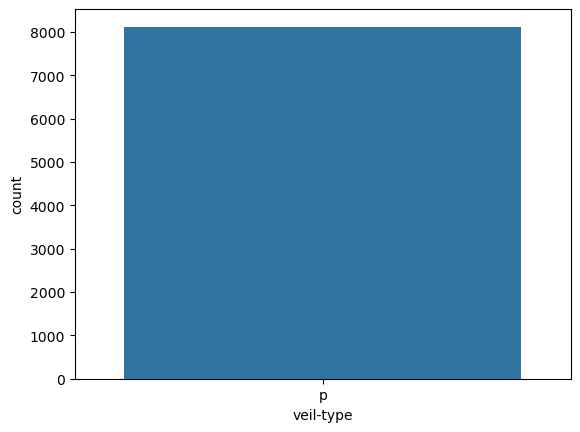

In [48]:
sns.countplot(x="veil-type", data=df)

In [49]:
df.drop('veil-type', axis=1, inplace=True)

> b) Grafique la distribución de cada variable

C:\Users\carlo\.conda\envs\ml\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


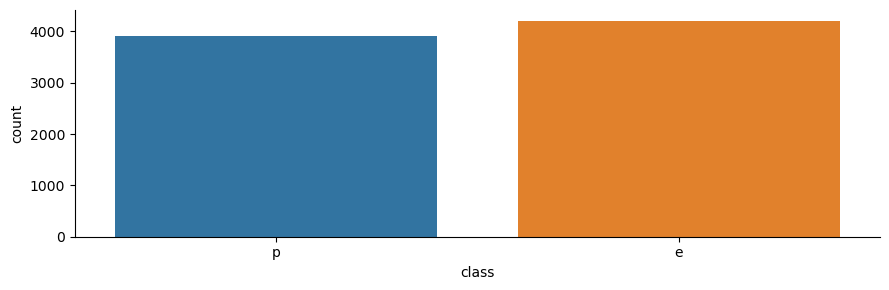

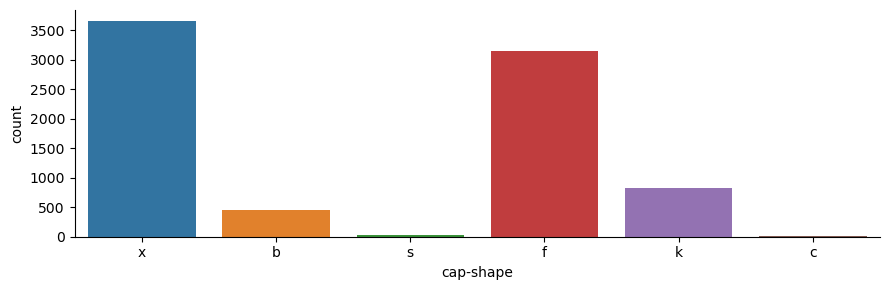

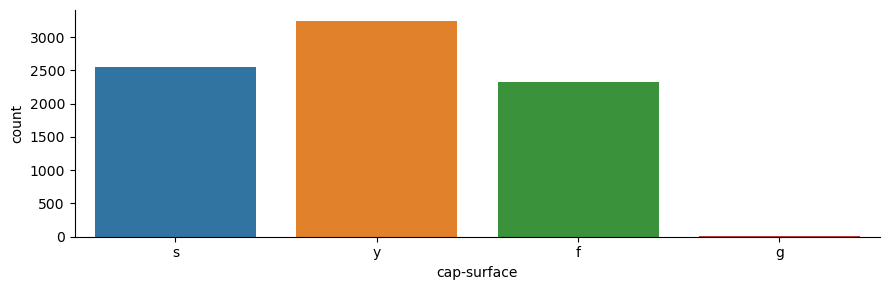

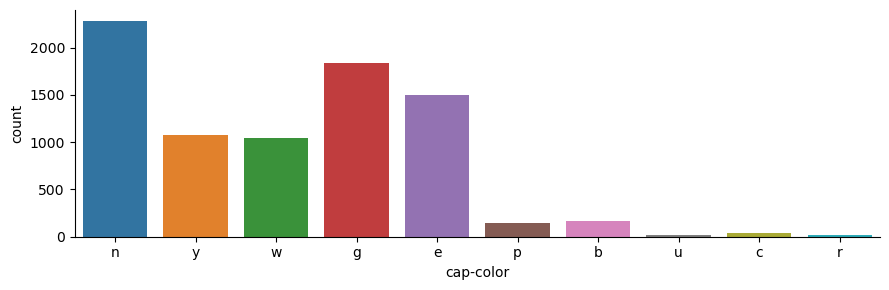

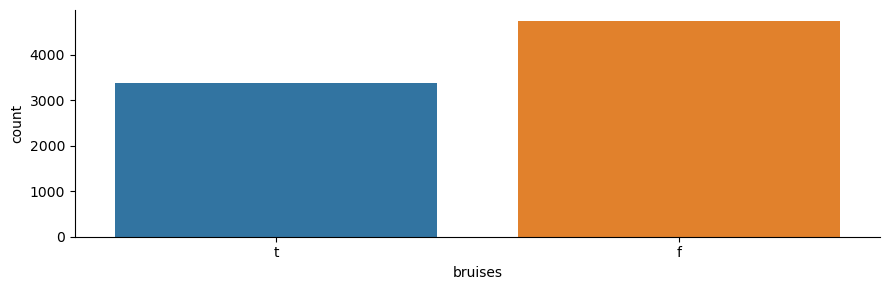

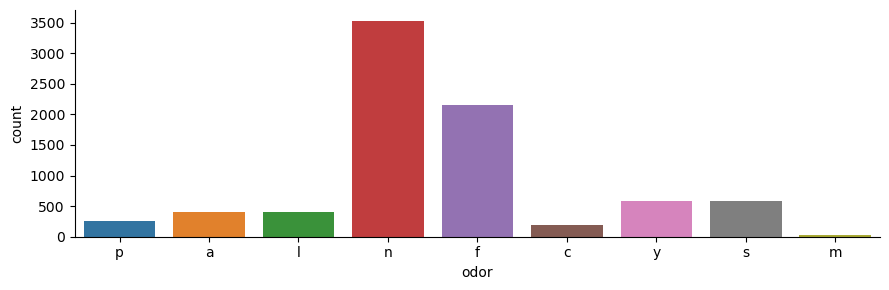

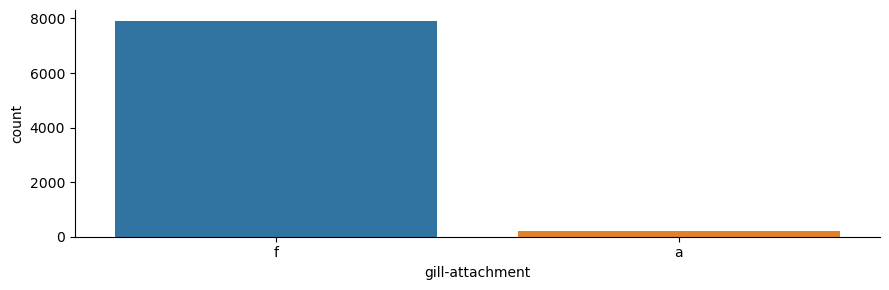

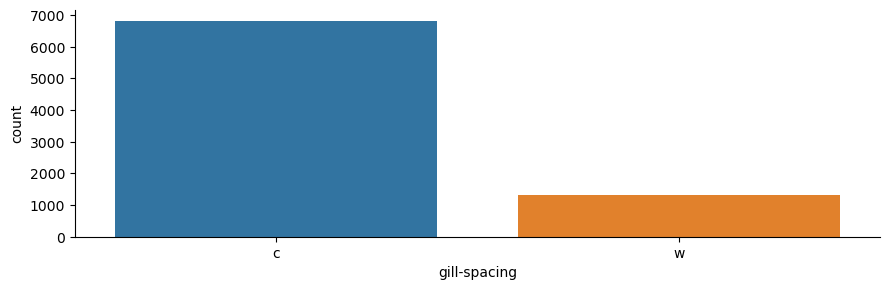

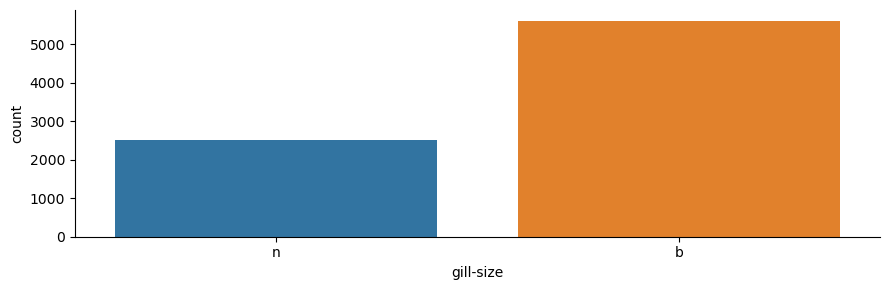

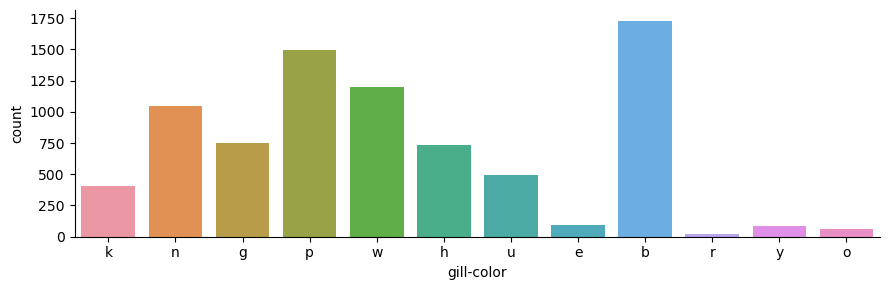

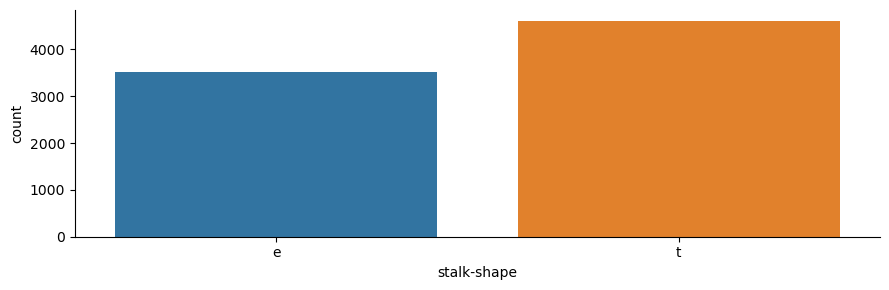

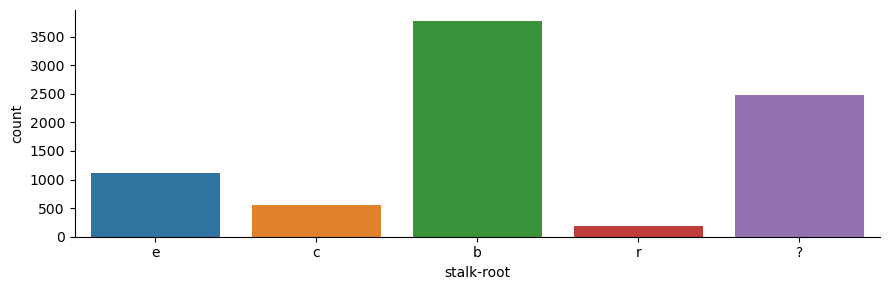

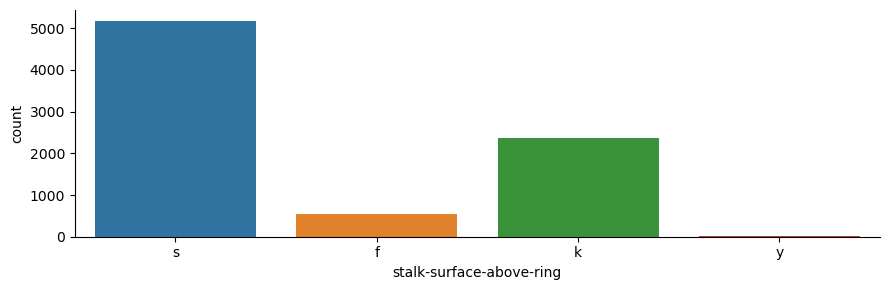

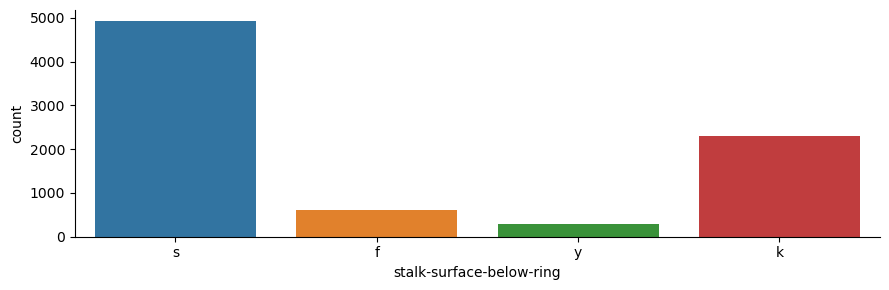

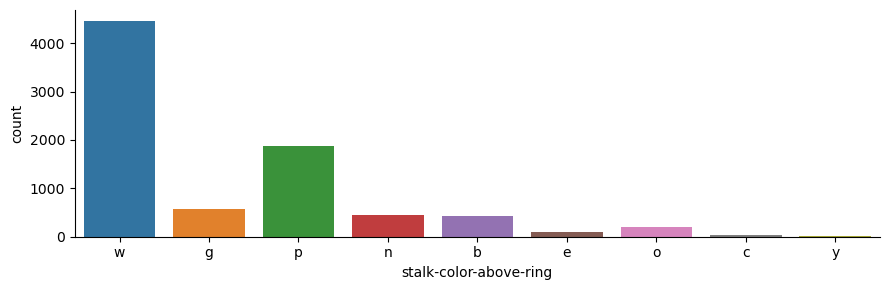

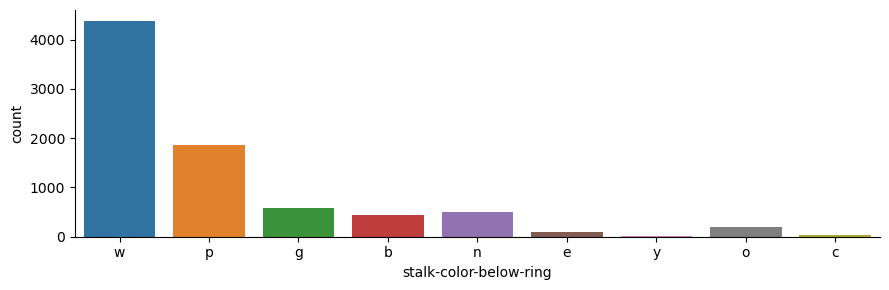

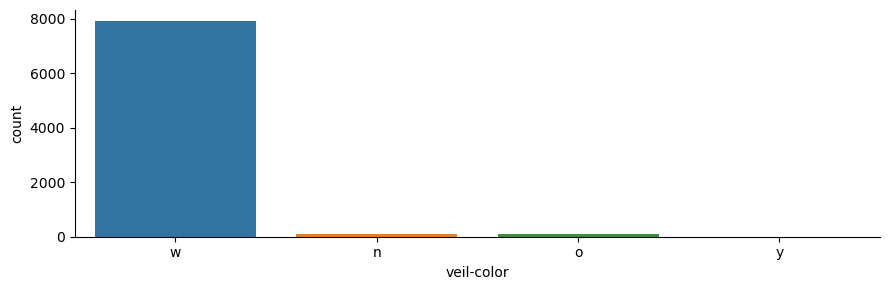

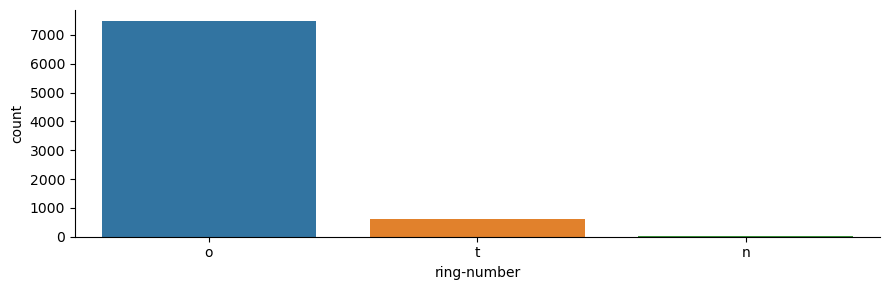

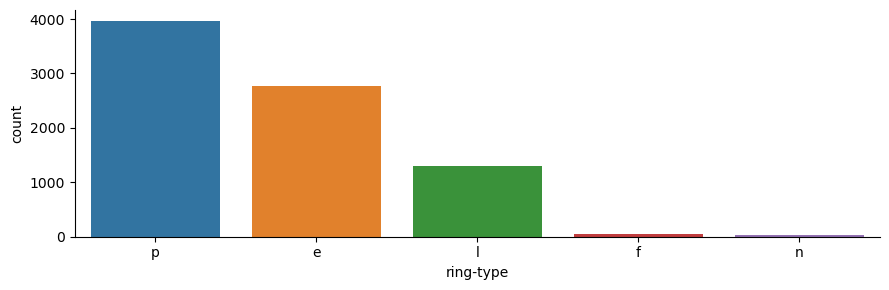

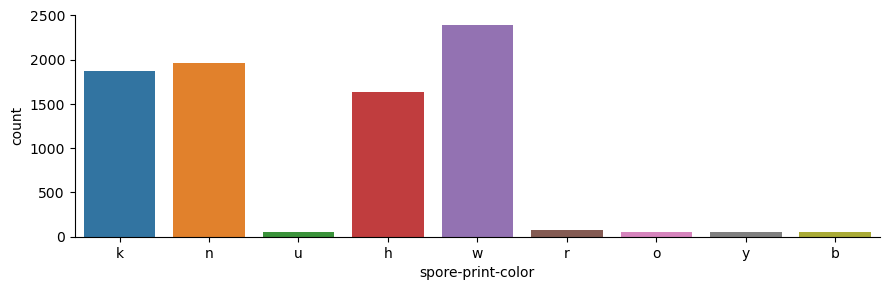

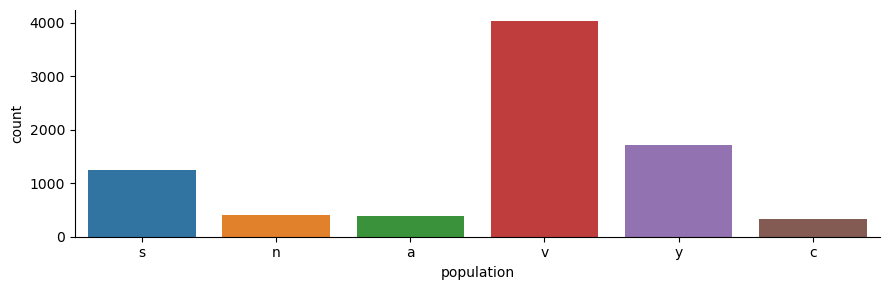

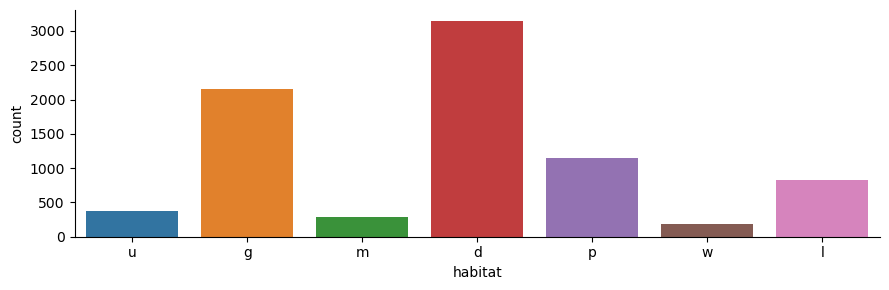

In [50]:
for col in df.columns:   
    sns.catplot(x=col, kind="count", data=df, height=3, aspect=3)

> c) Separe el conjunto de datos en los subconjuntos de entrenamiento y prueba.

In [51]:
# load data and split into train/test sets
train_set = df.sample(frac=0.7, random_state=42)
test_set = df.drop(train_set.index)

> d) Codifique las variables de entrada para que puedan ser trabajadas en las siguientes preguntas.

In [52]:
# create a list to store the columns to be dropped
drop_cols = []

# iterate over columns and check for binary variables
for col in train_set.columns:
    if len(train_set[col].unique()) == 2:
        # convert binary variables to 0/1
        train_set[col] = pd.factorize(train_set[col])[0]
        test_set[col] = pd.factorize(test_set[col])[0]
    else:
        # get dummies for categorical variables with more than 2 categories
        train_set = pd.concat([train_set, pd.get_dummies(train_set[col], prefix=col)], axis=1)
        test_set = pd.concat([test_set, pd.get_dummies(test_set[col], prefix=col)], axis=1)
        # add the original column to the list of columns to be dropped
        drop_cols.append(col)

# drop the original categorical columns from the train and test sets
train_set.drop(drop_cols, axis=1, inplace=True)
test_set.drop(drop_cols, axis=1, inplace=True)

# ensure that the train and test sets have the same columns
train_set, test_set = train_set.align(test_set, join='outer', axis=1, fill_value=0)

# print the shapes of the train and test sets
print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)


Train set shape: (5687, 112)
Test set shape: (2437, 112)


> e) Separe los subconjuntos en _X_ e _y_

In [53]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

print('X Train shape:', X_train.shape)
print('X Test shape:', X_test.shape)

X Train shape: (5687, 111)
X Test shape: (2437, 111)


### 2.1.2 Principal Component Analisis

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad comúnmente usada en machine learning para reducir el número de características en el conjunto de datos conservando la información más importante.

> a) Aplique PCA a los datos preprocesados para reducir el número de características a un conjunto más pequeño de componentes principales que capturen los patrones más importantes de los datos. Pruebe con n_components = n_features - k, donde k={1,10,50}, es decir, cree 3 posibles transformaciones de "*X_train*" y apliquelas sobre "*X_test*".

**Nota:** En adelante se le llamará "representación de los datos" a las distintas _feature selection/extraction_, por ejemplo: una posible representación de los datos es aplicar PCA con las 80 componentes principales.

In [54]:
n_features = len(X_train.columns)

k = 1, 10, 50

X_train_pca = []
X_test_pca = []

for i in k:
    pca = PCA(n_components=n_features - i)
    pca.fit(X_train)

    X_train_pca.append(pca.transform(X_train))
    X_test_pca.append(pca.transform(X_test))

In [55]:
X_train_pca[0].shape

(5687, 110)

In [56]:
X_train_pca[1].shape

(5687, 101)

In [57]:
X_train_pca[2].shape

(5687, 61)

### 2.1.3 Mutual Information

La información mutua es una medida de dependencia entre variables, se puede usar para medir el grado de asociación entre las _features_ y el _target_, y usar esta información para seleccionar las _features_ más relevantes para posteriormente realizar la clasificación. Al utilizar la información mutua para seleccionar las características más informativas, puede mejorar potencialmente el rendimiento de su modelo de aprendizaje automático reduciendo la cantidad de información irrelevante o redundante en el conjunto de datos.

> a) Calcule la información mutua entre cada característica y la variable objetivo (comestible o venenoso) para medir el grado de asociación entre cada característica y la variable objetivo.


In [58]:
mi =mutual_info_classif(X_train, y_train)

> b) Seleccione las n características con las puntuaciones de información mutua más altas como entrada para un modelo de aprendizaje automático. Pruebe con n = n_features - k, para k={1,10,50}, es decir, cree 3 posibles transformaciones de "X_train" y apliquelas sobre "X_test".

In [59]:
# set k to the number of features you want to exclude
k = 1, 10, 50

X_train_mi = []
X_test_mi = []

for i in k:
    # compute the number of features to select
    n = len(mi) - i
    # get the indices of the features sorted by mutual information score
    sorted_indices = np.argsort(mi)
    # select the top n features
    selected_indices = sorted_indices[-n:]
    
    X_train_mi.append(X_train.iloc[:,selected_indices])
    X_test_mi.append(X_test.iloc[:,selected_indices])

## 2.2 Modelos de clasificación

Primero entrenaremos el modelo Naïve Bayes con los conjuntos de datos de entrenamiento generados en el punto 2.1, luego entrenaremos otros clasificadores utilizando como conjunto de entrenamiento la mejor representación de los datos según las metricas de clasificación obtenidas con el modelo Naïve Bayes.

### 2.2.1 Naïve Bayes

Naïve Bayes es un modelo generativo clásico para la clasificación en el aprendizaje automático. En el contexto de la clasificación de hongos, puede utilizar Naïve Bayes para modelar la distribución de probabilidad de cada característica dada la etiqueta de clase (comestible o venenosa) y utilizar la regla de Bayes para calcular la probabilidad posterior de cada etiqueta de clase dadas las características observadas.

Al utilizar Naïve Bayes para la clasificación, se puede conseguir un buen rendimiento con cantidades relativamente pequeñas de datos de entrenamiento y modelos relativamente sencillos. Sin embargo, Naïve Bayes asume que las características son condicionalmente independientes dada la etiqueta de clase, lo que puede no ser cierto en la práctica. No obstante, Naïve Bayes puede ser un modelo _baseline_ útil para comparar con modelos más complejos.

Dado el conjuntos de entrenamiento con características observadas, se utiliza la regla de Bayes para calcular la probabilidad a posteriori de cada etiqueta de clase dadas las características observadas. La etiqueta de clase con la probabilidad a posteriori más alta sería la etiqueta de clase predicha para la muestra de hongos.

Si consideramos que $P(x_1, \dots, x_n)$ es constante, entonces:

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y).\end{aligned}\end{align}

Usted deberá utilizar la estimación Máxima A Posteriori (MAP) para estimar $P(y)$ y $P(x_i \mid y)$, donde $P(y)$ es la frecuancia relativa de la clase $y$ y $P(x_i \mid y)$ asumiremos que se distribuye de forma Gaussiana, es decir:

\begin{align}\begin{aligned}P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)\end{aligned}\end{align}

> a) ¿Qué otras distribuciones de probabilidad se pueden asumir para este problema considerando los valores posibles de las _features_ y del target en el conjunto de datos? Nombre mínimo 2.

Otras distribuciones de probabilidad que podemos asumir para este problema:
- Multinomial Naive Bayes: Considera la distribución Multinomial para las caracteristicas.
- Poisson Naive Bayes: Considera la distribución Poisson.


Para las preguntas b) y c) considere que los datos siguen una distribución de probabilidad Gaussiana y entrene el clasificador utilizando el módulo _GaussianNB_ de la librería _sklearn_.

> b) Entrene el clasificador Naïve Bayes con los datos en _bruto_, es decir, tal cual como vienen, sin haber aplicado ninguna extracción o selección de características.


In [60]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

> c) Entrene el clasificador Naïve Bayes con cada una de las representaciones obtenidas en el punto 2.1.

In [61]:
k = 0, 1, 2 

y_pred_pca = []
y_pred_mi = []

for i in k:
    clf_pca = GaussianNB()
    clf_pca.fit(X_train_pca[i], y_train)
    y_pred_pca.append(clf_pca.predict(X_test_pca[i]))
    
    clf_mi = GaussianNB()
    clf_mi.fit(X_train_mi[i], y_train)
    y_pred_mi.append(clf_mi.predict(X_test_mi[i]))

> d) Para cada representación de los datos del punto 2.1, obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn.

Primero mostraremos las metricas de clasificación con los datos en bruto, y posterior a esto, las mostraremos con los datos del punto 2.1. 


In [62]:
print(f"Classification report with original features")
print(classification_report(y_test, y_pred, target_names=['edible', 'poisonous']))

Classification report with original features
              precision    recall  f1-score   support

      edible       1.00      0.97      0.99      1303
   poisonous       0.97      1.00      0.98      1134

    accuracy                           0.98      2437
   macro avg       0.98      0.99      0.98      2437
weighted avg       0.98      0.98      0.98      2437



In [63]:
n = 1, 10, 50
for i in k:    
    print(f"PCA Classification report with {n_features-n[i]} features")
    print(classification_report(y_test, y_pred_pca[i], target_names=['edible', 'poisonous']))
    
for i in k:    
    print(f"Mutual Information Classification report with {n_features-n[i]} features")
    print(classification_report(y_test, y_pred_mi[i], target_names=['edible', 'poisonous']))

PCA Classification report with 110 features
              precision    recall  f1-score   support

      edible       1.00      0.03      0.06      1303
   poisonous       0.47      1.00      0.64      1134

    accuracy                           0.48      2437
   macro avg       0.74      0.51      0.35      2437
weighted avg       0.75      0.48      0.33      2437

PCA Classification report with 101 features
              precision    recall  f1-score   support

      edible       1.00      0.03      0.06      1303
   poisonous       0.47      1.00      0.64      1134

    accuracy                           0.48      2437
   macro avg       0.74      0.51      0.35      2437
weighted avg       0.75      0.48      0.33      2437

PCA Classification report with 61 features
              precision    recall  f1-score   support

      edible       0.89      0.97      0.93      1303
   poisonous       0.96      0.87      0.91      1134

    accuracy                           0.92      24

> e) Determine la mejor representación de los datos según las metricas obtenidas en la pregunta anterior y utilice esa representación de aquí en adelante para entrenar a los otros clasificadores.

Nos interesa elegir la medida que reduce los falsos negativos entregados por el modelo, de manera que no ocurra la situación de: el modelo indica comestible cuando es venenoso. Esta medida es el Recall, y por tanto se hace elección de la representación "Mutual Information with 110 features", que por lo demás es la mejor en todas las metricas de comparación, por lo que tampoco hay ambigüedad en la elección.
> f) Muestre los errores tipo 1 y tipo 2.

<Axes: >

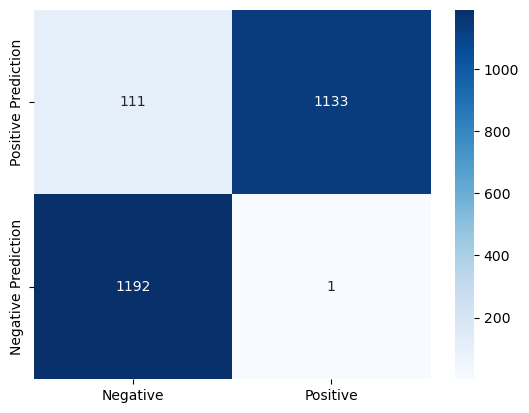

In [64]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred_mi[0])  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, tp], [tn, fn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Positive Prediction', 'Negative Prediction'])


### 2.2.2 Linear Discriminant Analisis

El análisis discriminante lineal (LDA) es un algoritmo clásico de clasificación lineal, y su objetivo es encontrar una combinación lineal de características que maximice la separación entre las dos clases (setas comestibles y venenosas). En otras palabras, el LDA intenta proyectar los datos en un espacio de menor dimensión, preservando al mismo tiempo la mayor discriminación de clases posible.

La etiqueta de clase con la media más cercana en el espacio transformado sería la etiqueta de clase predicha para la muestra de setas.

> a) ¿Qué es lo que asume el modelo LDA sobre la distribución condicional de las clases?

El modelo LDA asume que la distribución condicional de los atributos (características) dada una clase específica sigue una distribución normal muttivariada.

> b) ¿Qué es lo que asume el modelo LDA sobre las matrices de covarianza de la distribución condicional?

El modelo LDA asume que las matrices de covarianza de la distribución condicional son iguales entre las diferentes clases, es decir, la varianza de los atributos es la misma para todas las clases.

> c) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train_mi[0], y_train)

y_pred_lda = clf.predict(X_test_mi[0])


> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [66]:
print(classification_report(y_test, y_pred_lda, target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1303
   poisonous       1.00      1.00      1.00      1134

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



> e) Muestre los errores tipo 1 y tipo 2.

<Axes: >

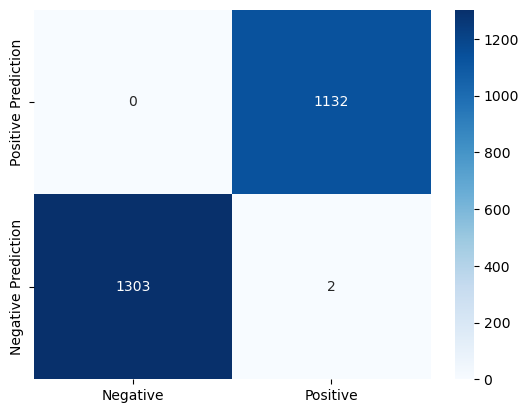

In [67]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred_lda)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, tp], [tn, fn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Positive Prediction', 'Negative Prediction'])


### 2.2.3 Regresión logística

La regresión logística es un modelo discriminativo de clasificación clásico que puede utilizarse para la clasificación de hongos. El objetivo de la regresión logística es encontrar el modelo lineal que mejor se ajuste y que pueda predecir la probabilidad de que cada muestra de hongo pertenezca a una clase determinada (comestible o venenosa).

> a) ¿En qué consiste la estimación de máxima verosimilitud de coeficientes?

La estimación de máxima verosimilitud de coeficientes es un método estadístico para estimar los parámetros de un modelo de probabilidad dado un conjunto de datos, que maximicen la probabilidad de observar los datos de entrenamiento dados los valores de entrada.

> b) ¿Qué asume este modelo de la relación entre las características y la variable objetivo?

El modelo de Regresión Logística asume una relación no lineal entre las características y la variable objetivo, y supone que los errores son independientes e idénticamente distribuidos, y siguen una distribución Bernoulli para la regresión logística binaria o una distribución multinomial para la regresión logística multiclase.

> c) ¿Qué se hace para evitar el sobreajuste de este modelo?

Para evitar el sobreajuste de este modelo podemos realizar alguna téctnica de regularización, selección de características, validación cruzada y/o aumentar la cantidad de datos.

> d) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

**Nota:** Usted puede variar o probar con distintos hiperparámetros siempre y cuando se utilizen de forma correcta el modelo y los datos para que pueda obtener predicciones comparables con los otros modelos. Puede basarse en los hiperparámetros probados con el regresor logistico y en la documentación de la librería.

In [68]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_mi[0], y_train)

y_pred_lg = clf.predict(X_test_mi[0])

> e) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [69]:
print(classification_report(y_test, y_pred_lg, target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       0.98      0.99      0.99      1303
   poisonous       0.99      0.98      0.98      1134

    accuracy                           0.99      2437
   macro avg       0.99      0.98      0.99      2437
weighted avg       0.99      0.99      0.99      2437



> f) Muestre los errores tipo 1 y tipo 2.

<Axes: >

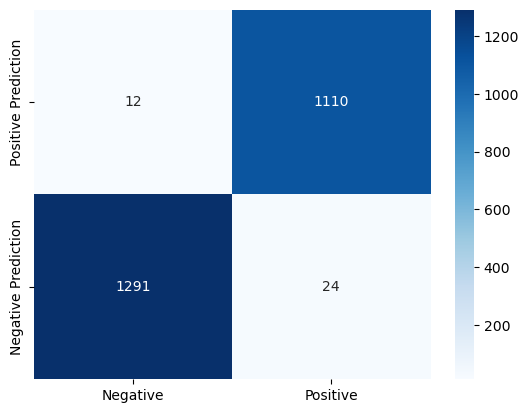

In [70]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred_lg)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[fp, tp], [tn, fn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Positive Prediction', 'Negative Prediction'])



### 2.2.4 Support Vector Machines

Las máquinas de vectores soporte (SVM) son un algoritmo de aprendizaje automático potente y versátil que puede utilizarse para la clasificación de hongos. La idea principal detrás de SVM es encontrar el hiperplano que mejor separa las diferentes clases en el conjunto de datos.

Utilice los datos de entrenamiento para ajustar un modelo SVM a los datos. Esto implica encontrar el hiperplano que maximice el margen entre las muestras positivas y negativas. El margen es la distancia entre el hiperplano y las muestras más cercanas de cada clase.

Si los datos no se pueden separar linealmente, utilice funciones de kernel para transformar los datos en un espacio de mayor dimensión en el que se puedan separar. Las funciones kernel más comunes incluyen funciones polinómicas, de base radial (RBF) y sigmoidales.

Entrene un clasificador SVM con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

Entrene el clasificador con los siguientes tipos de _kernel_:

> a) Lineal, con 2 valores del coeficiente gamma distintos.

> b) Polinómico, con 2 valores del coeficiente gamma distintos.

> c) rbf, con 2 valores del coeficiente gamma distintos.

In [71]:
from sklearn.svm import NuSVC

kernel = ['linear', 'poly', 'rbf']
gamma = ['scale', 'auto']

y_pred_scale = []
y_pred_auto = []

for k in kernel:
    clf = NuSVC(kernel=k, gamma=gamma[0])
    clf.fit(X_train_mi[0], y_train)
    y_pred_scale.append(clf.predict(X_test_mi[0]))

for k in kernel:
    clf = NuSVC(kernel=k, gamma=gamma[1])
    clf.fit(X_train_mi[0], y_train)
    y_pred_auto.append(clf.predict(X_test_mi[0]))


> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [72]:
for i in range(3):
    print(f"SVM with {kernel[i]} kernel and scale gamma")
    print(classification_report(y_test, y_pred_scale[i], target_names=['edible', 'poisonous']))
    
for i in range(3):
    print(f"SVM with {kernel[i]} kernel and auto gamma")
    print(classification_report(y_test, y_pred_auto[i], target_names=['edible', 'poisonous']))

SVM with linear kernel and scale gamma
              precision    recall  f1-score   support

      edible       0.86      1.00      0.92      1303
   poisonous       1.00      0.81      0.90      1134

    accuracy                           0.91      2437
   macro avg       0.93      0.91      0.91      2437
weighted avg       0.92      0.91      0.91      2437

SVM with poly kernel and scale gamma
              precision    recall  f1-score   support

      edible       0.87      1.00      0.93      1303
   poisonous       1.00      0.83      0.91      1134

    accuracy                           0.92      2437
   macro avg       0.94      0.92      0.92      2437
weighted avg       0.93      0.92      0.92      2437

SVM with rbf kernel and scale gamma
              precision    recall  f1-score   support

      edible       0.87      1.00      0.93      1303
   poisonous       1.00      0.83      0.91      1134

    accuracy                           0.92      2437
   macro avg    

> e) Muestre los errores tipo 1 y tipo 2.

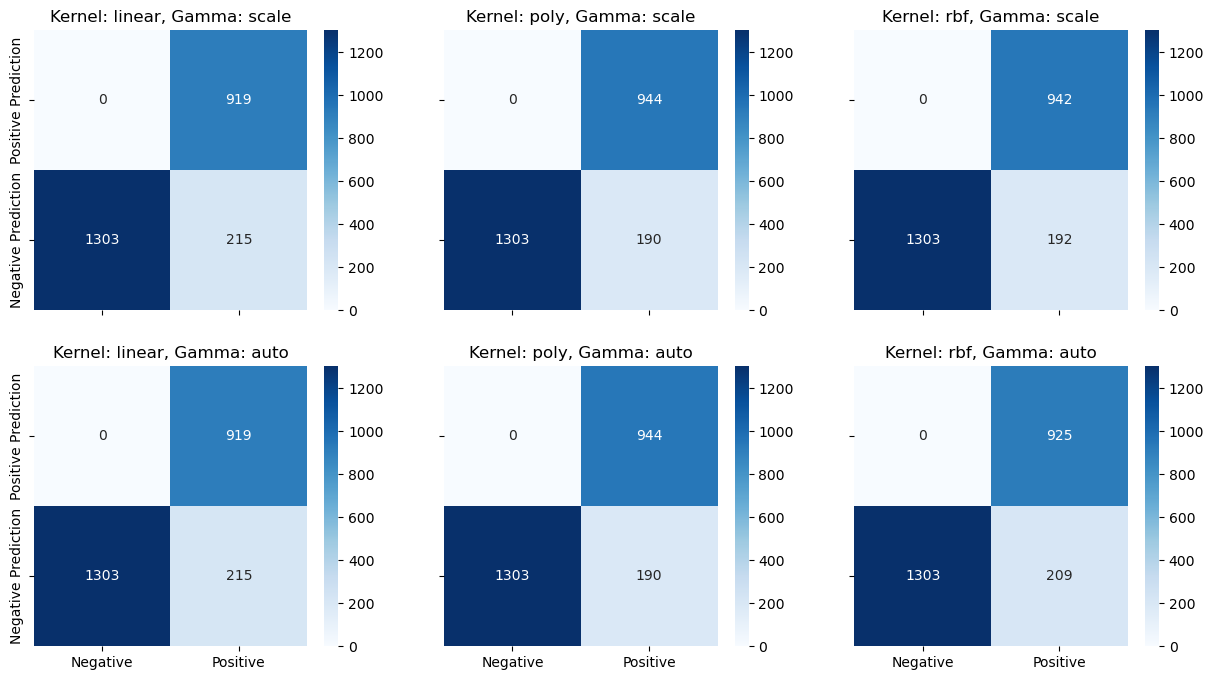

In [73]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True, sharex=True)
j=0

for y_pred in (y_pred_scale, y_pred_auto):
    for i in range(3):
        cm = confusion_matrix(y_test, y_pred[i])
        tn, fp, fn, tp = cm.ravel()
        error_matrix = [[fp, tp], [tn, fn]]
        sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Positive Prediction', 'Negative Prediction'], ax= axes[j,i])
        axes[j,i].set_title(f"Kernel: {kernel[i]}, Gamma: {gamma[j]}")
    j+=1

## 2.3 Conclusiones:

Podemos concluir que las herramientas utilizadas anteriormente son muy útiles en la tarea previa al ajuste de datos, herramientas como:
- Principal Component Analysis (PCA): Herramienta de reducción de dimensionalidad de los datos, útil para acelerar tiempos de computo y descartar información redundante.
- Mutual Information: Criterio de selección de características más relevantes para el problema.

Con el modelo de Naive Bayes Gausiano seleccionamos el mejor método de reducción de dimensionalidad acorde al contexto en que se está trabajando, en este caso es mucho más importante determinar cuando un hongo es venenoso y reportarlo como tal, a que un hongo sea comestible y se reporte como venenoso. Bajo estas condiciones se seleecciono el criterio de información mutua que al combinarse con Linear Discriminant Analysis reporta los mejores resultados entre los probados (menor cantidad de falsos positivos y negativos).